Post-processing
===

Usually with the auto-reduced data (see for <a href="../../auto_reduce/nomad_auto.html" target="_blank">here</a> more) or the manually reduced data (see <a href="./dr_howto.html" target="_blank">here</a> for more), one can already perform the total scattering data analysis, using, e.g., the unit-cell baesd approach. Tools available for such analysis can be found <a href="../data_analysis/software.html" target="_blank">here</a>. The symmetry constraint on the structural model for such unit-cell based approaches guarantees a limited parameter space, as compared to the degree of freedom of the data. In such a situation, one can safely treat the scale as one of the refinable parameters. However, this is not that much the case for the supercell based approach for total scattering data analysis, such as the reverse Monte Carlo (RMC) modeling. With the supercell approach, symmetry constraint will be completely removed after expanding the crystallographic unit cell to a supercell. The model has large number of degrees of freedom and will be driven completely by the data. Although some constraint could be added based on geometrical, physical, or chemical considerations, still the degree of freedom is too large as compared to the total number of data points involved in the modeling, and therefore it is unavoidable one may have the concerns about overfitting. Treating the RMC modeling in a statistical manner, by constructing an ensemble of RMC modeling trials, is a commonly used approach. On the data side, it requires one to treat the data more rigorously, especially concerning the data scaling -- it is always the best practice to try to make sure the data is on an absolute scale, which means the scale of the data and the model is directly comparable without the need for an extra scale factor. This section will cover the post-reduction treatment of the total scattering data and here ***we will be assuming the using of RMCProfile package for the total scattering data modeling***. For details about how to get RMCProfile to work, refer to the link <a href="https://rmcprofile.ornl.gov/download/" target="_blank">here</a> and <a href="https://rmcprofile.ornl.gov/how-to-launch-rmcprofile-program/" target="_blank">here</a>.

## Data Format Checking

1. Reciprocal space

    In RMCProfile, we follow the convention of defining symbols for various functions as presented in section-2 of Ref. {cite}`dkeents`. It is always strongly recommended that before feeding the data into RMCProfile, we should check the format of the data to see whether it is consistent with what we specify in the input for RMCProfile. For example, in our RMCProfile control file we specify our data format to be "F(Q)", that means we are referring our data to be the same format as defined by Eqn. (14) in Ref. [1]. It is noteworthy that in the community, people use the same symbol "F(Q)" to represent another format of the reciprocal space data, which is something like $Q[S(Q)-1]$, where S(Q) is the normalized total scattering structure factor as quoted in Eqn. (19-21) in Ref. {cite}`dkeents`. To tell which version of the data that the symbol "F(Q)" is representing, we can plot the data and inspect the low-Q region – if it is following our RMCProfile definition, the low-Q level should be somewhat sitting on a flat level (though, in practice it may not be purely flat due to low-Q noise). If it is following the $Q[S(Q)-1]$ definition, the low-Q level should then be sitting on an obvious slope due to the multiplicative $Q$ term in the definition.

2. Real space

    Similarly in real space, we also need to pay attention to the representation of the same symbol used in the community for different definitions. Again, in RMCProfile, we follow the definition as given in section-2 in Ref. {cite}`dkeents`. For example, when we say our data is in "G(r)" format, we mean Eqn. (10) in Ref. {cite}`dkeents`. The asymptotic behavior at low-$r$ and high-$r$ region is accordingly presented in Eqn. (15) in Ref. {cite}`dkeents`. Sometimes, with the same symbol "G(r)", one may mean the definition as in Eqn. (43) in Ref. {cite}`dkeents`, e.g., in `pdffit` community. The way to tell which version we mean by "G(r)" is similar as above -- we plot the data and inspect the low-$r$ region. If we see our data is sitting on an obvious slope, that means we have the definition as in the `pdffit` community. Otherwise, if the level in the low-$r$ region is somewhat flat, we are following the RMCProfile definition. After all, we need to do the necessary homework to check the data before throwing it into RMCProfile. The fitting engine will take what we tell it as granted and do whatever it can do to fit the data. So, if we tell it something wrong, it can never do it right.

## Rebin

Following the definition of discrete Fourier transform (see <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform" target="_blank">Wikipedia</a>, for example), we require the data to be transformed to be sitting on an equally-spaced grid. If our original data is not in such format, we could use the tool `rebin` that is bundled in the RMCProfile package to rebin the data to be equally-space. Usage of this tool is straightforward -- just input the starting and ending points together with the interval following the order as prompted on terminal, it should do the job properly.

## Scaling

To rescale the total scattering data (with the aim of bringing the data to an absolute scale), we can use the `stog_new` tool bundled in RMCProfile package. Here we have a template input for this tool.

> N.B. Comments here are for instruction purpose only -- in pratice when running `stog_new`, comments are not allowed.

```
1                            # Number of files
input_binned_data.dat        # Input file name
0.4 30.0                     # Qmin Qmax
0 1                          # yoffset yscale, so that output_y = data/yscale + yoffset
0                            # Qoffset, normally we can leave it as 0
scale.sq                     # scaled S(Q)
scale.gr                     # scaled G(r)
50                           # rmax
5000                         # Number of points in r-space
N                            # windows function? (which makes the peaks more smooth, less noise, less ripples)
0.0764                       # number density (angstrom^-3)
0                            # yoffset, normally we can keep it as 0
N                            # Try again, normally keep it as 'N'
Y                            # Fourier Filter?
1.0                          # rcutoff for Fourier filter, meaning data in real-space below the
                             # cutoff will be filtered out. The corresponding components will also be
                             # removed in Q-space
scale_ft.sq                  # Fourier filtered S(Q)
scale_ft.gr                  # Fourier filtered G(r)
0.08                         # Faber-Ziman coefficient, for X-ray, if the data has been normalized, we can
                             # put 1 here
scale_ft_rmc.fq              # F(Q) used by RMC
scale_ft_rmc.gr              # G(r) used by RMC
scale_ft_rmc.dr              # D(r) used by RMC
5 1.0 3.0                    # cutoff, rmin of 1st peak, rmax of 1st peak. The purpose is to remove ripples
                             # in the low-r region and those between the first and second peak.
```

Using the template provided above, we can fill in information specific to our data and sample, remove all blank lines and comments, and then run the program from the RMCProfile terminal window like,

```bash
stog_new < get_stog_input.txt
```

where `get_stog_input.txt` is our saved stog iput file.

Things to keep in mind are,

1. In line-4 of the input file, we specify the offset and scale for our data which would then rescale our data according to the formula presented in the comments. The end product we are pursuing here is the normalized total scattering structure factor, which, simply put, should go to $1$ in the high-$Q$ region.

2. However, here may come the question that we have two parameters to control the level at high-$Q$. In practice, we can have infinite number of combinations of offset and scale to achieve the same high-$Q$ level. How do we move forward with this? First option is to refer to the low-$r$ behavior in the data output from the Fourier filter step -- `scale_ft.gr` in the example presented above. If the data is scaled properly, we are expecting the Level-1 and Level-2 (see picture down below) to be on the same level.

    <img src="../../imgs/stog_scale.png" alt="drawing" width="800"/>
    
3. Quite often, even going through the step above still won’t bring our data to an absolute scale, in which case the only way left is probably to go through the painful trail-and-error process. That means we may want to play around with different scales of the data and see its effect on the fitting. In most cases, if the data scaling is not proper, not refining scale in RMCProfile has little chance to fit the data well.

4. Alternative option one is to fit scale and offset in RMCProfile, especially for X-ray data.

5. Alternative option two is to fit the scale in, e.g., PDFgui first and use the scale obtained there to rescale our data.

Apart from the `stog_new` tool in the RMCProfile package, one can also use the `pystog` python module (which was developed following the same underlying principle as `stog_new`) for post-processing the total scattering data. The post-processing tab in ADDIE is using `pystog` as the backend engine for the data scaling and Fourier transform (see <a href="./dr_howto.html" target="_blank">here</a> for more information). One can refer to the link <a href="https://github.com/neutrons/pystog#installation" target="_blank">here</a> for the instruction about installing and using `pystog`. The package was developed in a modular manner so we could build our own Python wrapper script to call those available `pystog` modules. Also, a command-line interface (CLI) `pystog_cli` was developed to take in an input JSON file and the running logic is pretty much similar to the `stog_new` program, as detailed above. A typical input JSON file for `pystog_cli` is presented here,

```json
{
  "Files": [
    {
      "Filename": "DATA_FILE_NAME.sq",
      "ReciprocalFunction": "S(Q)",
      "Qmin": 0.5,
      "Qmax": 40.0,
      "Y": {
        "Offset": 0.0,
        "Scale": 1.0
      },
      "X": {
        "Offset": 0.0
      }
    }
  ],
  "RealSpaceFunction": "g(r)",
  "NumberDensity": 0.049948,
  "Rmax": 50.0,
  "Rpoints": 5000,
  "FourierFilter": {
    "Cutoff": 1.5
  },
  "<b_coh>^2": 0.17215,
  "LorchFlag": false,
  "RippleParams": [
    0.0,
    0.0,
    0.0
  ],
  "Outputs": {
    "StemName": "OUTPUT_STEM_NAME"
  }
}
```

Most of the parameters involved in the JSON file are in one-to-one mapping relation with those parameters for the `stog_new` program. There is only one extra parameter in the JSON file -- the `RealSpaceFunction` parameter which contols the format of the real space function to be used for the intermediate processing (i.e., the Fourier filter). Usually the default option `g(r)` should be working but if needed, one can change it to, e.g., `G(r)`.

## Demonstration

> A demo dataset for Si standard sample is included here -- one can download the dataset by clicking  <a href="../../files/si_demo_data.zip" target="_blank" download>this link</a>.

### Step-by-step instructions using `RMCProfile`

0. In this demo, I will be using the RMCProfile package and the two programs coming with the package -- `rebin` and `stog_new` for post-processing the demo data for the Si standard sample.

1. First, download the demo data (see the link just above) to your local area.

2. Unzip the downloaded package to somewhere, e.g., in my case, under `d:\Temp_Local` so that we can see the following files and sub-directories under it,

    ```
    exp.json
    GSAS
    Logs
    SofQ
    SofQ_merged
    StoG
    Topas
    ```

3. Download the RMCProfile package if you haven't already got it, following the link, <a href="https://rmcprofile.ornl.gov/download/" target="_blank">https://rmcprofile.ornl.gov/download</a>

4. Launch the RMCProfile terminal -- the actual way of launching will depend on your operating system. Detailed instructions for each platform can be found here, <a href="https://rmcprofile.ornl.gov/how-to-launch-rmcprofile-program" target="_blank">https://rmcprofile.ornl.gov/how-to-launch-rmcprofile-program</a>

    > N.B. In the demo video below, I am using the Windows version of the RMCProfile package.

5. Change to the working directory from the RMCProfile terminal (e.g., `cd d:\Temp_Local\SofQ_merged` in my case, and on Windows, we may need to type `d:` from command line to change to the right disk), where you are going to see the following files (run `dir` on Windows, or `ls -al` on Linux/Unix),

    ```
    get_stog_data.txt
    NOM_Si_640d_bank1.dat
    NOM_Si_640d_bank2.dat
    NOM_Si_640d_bank3.dat
    NOM_Si_640d_bank4.dat
    NOM_Si_640d_bank5.dat
    NOM_Si_640d_bank6.dat
    NOM_Si_640d_merged.sq
    Si_merge.json
    ```

6. Rebin the data by running `rebin` from the RMCProfile terminal and feeding in the input file name when asked -- in this case, `NOM_Si_640d_merged.sq`. Then enter `0.5 0.01 40.0` when asked for next-step parameters, followed by inputting the output file name `NOM_Si_640d_merged_rebin.sq` when asked.

7. Run `stog_new < get_stog_data.txt` from the RMCProfile terminal to process the rebinned data, and after running it, the directory should contain the following files,

    ```
    ft.dat
    get_stog_data.txt
    NOM_Si_640d_bank1.dat
    NOM_Si_640d_bank2.dat
    NOM_Si_640d_bank3.dat
    NOM_Si_640d_bank4.dat
    NOM_Si_640d_bank5.dat
    NOM_Si_640d_bank6.dat
    NOM_Si_640d_merged.sq
    NOM_Si_640d_merged_rebin.sq
    Si_640d_scaled.gr
    Si_640d_scaled.sq
    Si_640d_scaled_ft.gr
    Si_640d_scaled_ft.sq
    Si_640d_scaled_ft_rmc.dr
    Si_640d_scaled_ft_rmc.gr
    Si_640d_scaled_ft_rmc.sq
    ```

The `Si_640d_scaled.sq` and `Si_640d_scaled.gr` file is the scaled normalized $S(Q)$ data and its Fourier transform, respectively. The `Si_640d_scaled_ft.sq` and `Si_640d_scaled_ft.gr` is the same dataset but with Fourier filter applied. The `Si_640d_scaled_ft_rmc.sq`, `Si_640d_scaled_ft_rmc.gr` and `Si_640d_scaled_ft_rmc.dr` are files in RMCProfile `F(Q)`, `G(r)` and `D(r)` format, respectively.

### Demo video using `RMCProfile`

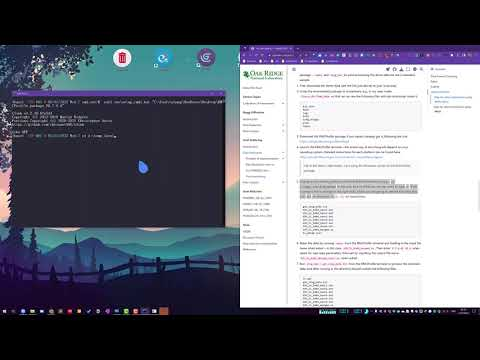

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lN8csTJ3XDY', width=720, height=500)

### Dealing with noisy data

In practice, it is unavoidable that we would have noise in our data and sometimes the noise level might be on a significant level. Fourier transforming such noisy dataset needs some special care. On one hand, we might want to reduce the maximum $Q$ to diminish the contribution of noise from the high-$Q$ region. On the other hand, since the finite $Q$ range would have broadening effect in real-space due to the truncation in $Q$-space. The smaller maximum $Q$ being used, the more significant the broadening effect would be. Both of the two aspects could help smoothing out the data in real-space. However, the other side of the coin is that such a broadening effect could potentially smooth out the real features at the same time. As such, it may be necessary to try different maximum $Q$ values to obtain different datasets and see the effect upon the data analysis result. In the demo below, we will be present a practical way to deal with the noisy data, *but it should be kept in mind that there is really not a golden rule for deciding the most suitable maximum $Q$ value to be used, and in practice, back-and-forth efforts might be needed*.

1. Download the demo data, by clicking on the link <a href="../../files/NOM_Si_640d_merged_noisy.sq" target="_blank" download>here</a>.

2. Copy over the `get_stog_data.txt` file from the step-5 in the section just above to the same location where the downloaded data is sitting and change to that directory from RMCProfile terminal. For example, on my Windows machine, I downloaded the data to `d:\Downloads\`, in which case I would execute,

    ```
    cd d:\Downloads\
    d:
    ```

    from my RMCProfile terminal window.

3. The downloaded data should have already been binned properly so the first step of rebinning in the previous instruction could be skipped. Open the `get_stog_data.txt` file in a text editor and change the file name in the second line of the file to `NOM_Si_640d_merged_noisy.sq` in accordance with the data file just downloaded. Also, change the `Qmax` value in the third line of the file to `35.0` and meanwhile change all the output file names to be specific to the `Qmax` value being used. The changed file should be looking like this,

    ```
    1
    NOM_Si_640d_merged_noisy.sq
    0.5 35.0
    0.0 1.0
    0
    Si_640d_scaled_qmax35p0.sq
    Si_640d_scaled_qmax35p0.gr
    50
    5000
    N
    0.049948
    0
    N
    y
    1.5
    Si_640d_scaled_ft_qmax35p0.sq
    Si_640d_scaled_ft_qmax35p0.gr
    0.17215
    Si_640d_scaled_ft_rmc_qmax35p0.sq
    Si_640d_scaled_ft_rmc_qmax35p0.gr
    Si_640d_scaled_ft_rmc_qmax35p0.dr
    0.0 0.0 0.0
    ```
    
    and save the changed file to `get_stog_data_qmax35p0.txt`

4. Change the `Qmax` to several other different values (e.g., 32.5, 30.0 and 25.0), by repeating the step-3. Then execute all the saved stog input file to obtain a series of processed datasets, and then compare the outcome. For example, plot `Si_640d_scaled_ft_rmc_qmax35p0.gr` together with all the other similar files corresponding to other `Qmax` values outcome to see the effect of changing `Qmax`. Usually, the features that change significantly with the changing of `Qmax` are with higher chance being Fourier ripples. Also, we may need to pay attention to those features that do not change that much until reducing the `Qmax` to a certain value, and that can give us some hint about the lower limit of the `Qmax` value.

5. In some rare cases (not in this demo one), changing `Qmax` alone may not eliminate the noise in data. Then one might need to smooth out the real-space pattern by introducing a Lorch modification function in $Q$-space, as originally proposed by Lorch -- see the reference <a href="https://iopscience.iop.org/article/10.1088/0022-3719/2/2/305" target="_blank">here</a>. To do this, use the following `stog` input file,

    ```
    1
    NOM_Si_640d_merged_noisy.sq
    0.5 35.0
    0.0 1.0
    0
    Si_640d_scaled_qmax35p0.sq
    Si_640d_scaled_qmax35p0.gr
    50
    5000
    Y
    0.049948
    0
    N
    y
    1.5
    Si_640d_scaled_ft_qmax35p0.sq
    Si_640d_scaled_ft_qmax35p0.gr
    Si_640d_scaled_ft_qmax35p0_lorched.gr
    0.17215
    Si_640d_scaled_ft_rmc_qmax35p0_lorched.sq
    Si_640d_scaled_ft_rmc_qmax35p0_lorched.gr
    Si_640d_scaled_ft_rmc_qmax35p0_lorched.dr
    0.0 0.0 0.0
    ```
    
    where the major change is happening in line-10 (from `N` to `Y`, indicating a Lorch function is to be applied.).

### Step-by-step instructions using `pystog`

Here, we will be performing similar task as in previous demonstration, i.e., rebin & rescale data, and Fourier transform. The tool being used here is `pystog` (see the <a href="https://github.com/neutrons/pystog" target="_blank">github repo</a> for the resource codes and documentation). Beyond the tasks we have been walking through in previous steps, we will be using the power of the `pystog` engine to perform tasks like converting in between different data formats needed by different software.

Here, we will be using Google Colab notebook which is a dedicated environment for this demo. It covers the installation of necessary software package and actual codes for performing the data processing tasks. So, for this demo, you can visit the link <a href="https://colab.research.google.com/drive/1M-uogoj1Oka1-SlKGfzcO0YvJMMm4SkT?usp=sharing" target="_blank">here</a> and log in with your Google account to be able to run the notebook.

Beyond this demo, `pystog` can be installed on your local machine. For the installation, we strongly recommend installing `conda`, for which one can refer to <a href="https://docs.anaconda.com/free/anaconda/install/index.html" target="_blank">this link</a>. Once `conda` is installed,

1. Create a `conda` environment named, e.g., `pystog`, by running `conda create -n pystog python=3.7`

2. Then activate the environment, `conda activate pystog`

3. Install `pystog` either `pip` by running `pip install pystog`, or via `conda` by running `conda install -c neutrons pystog`

4. From the terminal, change to the demo data directory. Following the example as presented above, in my case, the command is `cd d:\Temp_Local\SofQ_merged`, followed by running `d:` to make sure we are in the `d:` drive.

5. Put the following contents into a Python script file and name it as, e.g., `proc_pystog.py`,

    ```python
    import numpy as np
    from matplotlib import pyplot as plt
    
    # Load in data
    q, sq = np.loadtxt("./NOM_Si_640d_merged.sq", unpack=True, skiprows=2)
    
    # Rebin data
    from pystog import Pre_Proc
    rebin = Pre_Proc.rebin
    q_rebin, sq_rebin = rebin(q, sq, 0.5, 0.01, 40.0)
    with open("NOM_Si_640d_merged_rebin_pystog.sq", "w") as f:
        for i, q_val in enumerate(q_rebin):
            f.write("{0:10.3F}{1:15.6F}\n".format(q_val, sq_rebin[i]))
    
    # plot data
    plt.plot(q, sq, 'o-', label="original data")
    plt.plot(q_rebin, sq_rebin, 'v-', label="rebinned data")
    plt.legend()
    plt.xlim([1.9, 2.1])
    plt.ylim([-1, 22])
    plt.show()
    
    # Convert the normalized S(Q) to F(Q)
    from pystog import Converter
    converter = Converter()
    fq, _ = converter.S_to_F(q_rebin, sq_rebin)
    
    # plot data
    plt.plot(q_rebin, fq)
    plt.show()
    
    # Convert the normalized S(Q) to FK(Q)
    kwargs = {'<b_coh>^2': 0.17215}
    fkq, _ = converter.S_to_FK(q_rebin, sq_rebin, **kwargs)
    
    # plot data
    plt.plot(q_rebin, fkq)
    plt.show()
    
    # Transform into real-space G(r)
    from pystog import Transformer
    transformer = Transformer()
    r = np.linspace(0., 50., 5000)
    r, gr, _ = transformer.S_to_G(q_rebin, sq_rebin, r)
    
    # plot data
    plt.plot(r, gr)
    plt.show()
    
    # Convert G(r) to GK(r)
    kwargs = {'rho': 0.049948, '<b_coh>^2': 0.17215}
    gkr, _ = converter.G_to_GK(r, gr, **kwargs)
    
    # plot data
    plt.plot(r, gkr)
    plt.show()
    ```
    
6. Next, we will be performing the comprehensive `stog` processing as we have seen in previous demo, but this time using the `pystog` engine. First, create a directory under the current working directory, with the name, e.g., `pystog_proc` and change to that directory from command line, by running `cd pystog_proc`. Then, download the JSON input file, by clicking on the link <a href="../../files/si_pystog_demo.json" target="_blank" download>here</a> and move it to the created `pystog_proc` directory. Then from the command line, execute,

    ```
    pystog_cli --json si_pystog_demo.json
    ```
    
    to run the `pystog` processing, and all files generated will be put in the current working directory, which is `pystog_proc`.

### Step-by-step instructions using `ADDIE`

1. As above, grab the demo data for Si standard sample and unzip to somewhere in your local area, e.g., `/SNS/users/y8z/Temp/` in my demo case. Here we will be using the `ADDIE` software deployed on the analysis cluster. So, you should log in analysis using your UCAMS credential, using either a web browser or ThinLinc (the domain name is <a href="https://analysis.sns.gov" target="_blank">https://analysis.sns.gov</a>). Then launch a terminal and type in `addie --dev` to start `ADDIE`.

    <img src="../../imgs/analysis_term.png" alt="drawing" width="600"/>

    > N.B. Since we need to log in analysis and use `ADDIE` from there, we need to download the demo data from within analysis. Sometimes, launching the browser from within the analysis can take a long time, in which case one can use the following command from the terminal,
    
    > `wget --no-check-certificate https://powder.ornl.gov/files/si_demo_data.zip`

2. In `ADDIE`, change the output directory to where the downloaded data is unzipped to, e.g., `/SNS/users/y8z/Temp/`.

    <img src="../../imgs/addie_output_dir_demo_1.gif" alt="drawing" width="600"/>

3. Click on the `Post Processing` tab in the `ADDIE` interface,

    <img src="../../imgs/addie_pp_1.png" alt="drawing" width="600"/>

4. Click on the `Load` button and browse to the `NOM_Si_640d.nxs` file under the `SofQ` directory of the downloaded package,

    <img src="../../imgs/addie_load_demo.gif" alt="drawing" width="600"/>

5. Once the data is loaded in, click on the `Extract` button to extract the workspace, and the extracted data will be populated in the `Raw Data` tree under `File List`, where one can right click to plot the data,

    <img src="../../imgs/addie_extract_demo.gif" alt="drawing" width="600"/>

6. Then load in the merge configuration file, followed by clicking on the `Merge` button to merge the bank-by-bank data,

    <img src="../../imgs/addie_merge_demo.gif" alt="drawing" width="600"/>

    > N.B. The merge configuration file is a JSON file containing the range to be used for each bank, together with the offset and scale parameters for each bank. One can open the JSON file with any preferred text editor to inspect and change the contents.
    
7. Finally, load in the `pystog` configuration file, followed by clicking on the `StoG` button to perform the `pytstog` processing,

    <img src="../../imgs/addie_pystog_demo.gif" alt="drawing" width="600"/>